In [1]:
import matplotlib.pyplot as plt
import csv


In [40]:
def read_two_spiral_file(filename="spiralsdataset.csv"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            x.append(list(map(float, row[:-1])))
            y.append(int(row[-1]))
    return x, y

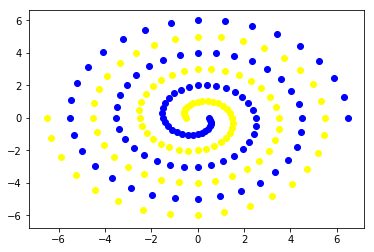

In [42]:
# scatter x and y
x, y = read_two_spiral_file()

# get which ones are 1, which ones are zero
blue_x = []
blue_y = []
yellow_x = []
yellow_y = []

for idx, point in enumerate(x):
    if y[idx] == 0:
        # append to blue
        blue_x.append(x[idx][:1])
        blue_y.append(x[idx][-1])
        pass
    else:
        # go to yellow
        yellow_x.append(x[idx][:1])
        yellow_y.append(x[idx][-1])
        pass

plt.scatter(blue_x, blue_y, c='blue')
plt.scatter(yellow_x, yellow_y, c='yellow')
plt.show()

In [43]:
import numpy as np

np_blue_x = np.array(blue_x) # features
np_blue_y = np.array(blue_y) # labels

print(np_blue_x.shape)
print(np_blue_y.shape)


# Multilayer Perceptron
# import tensorflow as tf



(97, 1)
(97,)


In [60]:
def one_hot_encode_binary(labels):
    encoded = []
    
    for label in labels:
        if label == 0:
            encoded.append([0])
        else:
            encoded.append([1])
    
    return encoded

y_encoded = one_hot_encode_binary(y)

In [61]:
import tensorflow as tf

np_x = np.array(x) # features 
np_y = np.array(y_encoded) # labels

print(np_x.shape)
print(np_y.shape)

(194, 2)
(194, 1)


In [66]:
# placeholders for data
x_pl = tf.placeholder(tf.float32, np_x.shape)
y_pl = tf.placeholder(tf.float32, np_y.shape)

l0_units = 10

# Neural Network
# 1st layer
l0_w = tf.Variable(tf.random_normal([2, l0_units]))
l0_b = tf.Variable(tf.random_normal([l0_units]))
l0 = tf.nn.sigmoid(tf.add(tf.matmul(x_pl, l0_w), l0_b))

# 2nd layer
l1_w = tf.Variable(tf.random_normal([l0_units, 1]))
l1_b = tf.Variable(tf.random_normal([1]))
l1 = tf.nn.sigmoid(tf.add(tf.matmul(l0, l1_w), l1_b))

# cost function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_pl, predictions=l1))

# optimizer algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# training
n_epochs = 5000

errors = []

with tf.Session() as sess:
    # tf.global_variables_initializer().run()
    
    sess.run(tf.global_variables_initializer())
    for i in range(n_epochs):
        _, error = sess.run([optimizer, cost], feed_dict={x_pl: np_x, y_pl: y_encoded})
        errors.append(error)
        print('epoch: ', i, 'error: ', error)
        






epoch:  0 error:  0.2821332
epoch:  1 error:  0.28208536
epoch:  2 error:  0.28203753
epoch:  3 error:  0.2819898
epoch:  4 error:  0.281942
epoch:  5 error:  0.2818944
epoch:  6 error:  0.28184673
epoch:  7 error:  0.2817991
epoch:  8 error:  0.2817515
epoch:  9 error:  0.28170395
epoch:  10 error:  0.28165644
epoch:  11 error:  0.28160897
epoch:  12 error:  0.28156152
epoch:  13 error:  0.28151414
epoch:  14 error:  0.2814668
epoch:  15 error:  0.28141946
epoch:  16 error:  0.28137213
epoch:  17 error:  0.2813249
epoch:  18 error:  0.2812777
epoch:  19 error:  0.28123048
epoch:  20 error:  0.28118336
epoch:  21 error:  0.28113618
epoch:  22 error:  0.28108916
epoch:  23 error:  0.28104207
epoch:  24 error:  0.28099507
epoch:  25 error:  0.2809481
epoch:  26 error:  0.2809012
epoch:  27 error:  0.28085428
epoch:  28 error:  0.2808074
epoch:  29 error:  0.28076062
epoch:  30 error:  0.2807138
epoch:  31 error:  0.28066707
epoch:  32 error:  0.28062034
epoch:  33 error:  0.2805737
epoch

epoch:  273 error:  0.2705024
epoch:  274 error:  0.27046537
epoch:  275 error:  0.27042845
epoch:  276 error:  0.27039158
epoch:  277 error:  0.27035475
epoch:  278 error:  0.2703179
epoch:  279 error:  0.27028114
epoch:  280 error:  0.27024445
epoch:  281 error:  0.27020776
epoch:  282 error:  0.2701711
epoch:  283 error:  0.2701345
epoch:  284 error:  0.270098
epoch:  285 error:  0.2700615
epoch:  286 error:  0.270025
epoch:  287 error:  0.26998866
epoch:  288 error:  0.26995233
epoch:  289 error:  0.26991594
epoch:  290 error:  0.26987967
epoch:  291 error:  0.2698434
epoch:  292 error:  0.26980722
epoch:  293 error:  0.26977107
epoch:  294 error:  0.26973498
epoch:  295 error:  0.26969886
epoch:  296 error:  0.26966286
epoch:  297 error:  0.26962692
epoch:  298 error:  0.26959097
epoch:  299 error:  0.26955506
epoch:  300 error:  0.2695192
epoch:  301 error:  0.2694834
epoch:  302 error:  0.26944762
epoch:  303 error:  0.26941195
epoch:  304 error:  0.26937625
epoch:  305 error:  

epoch:  545 error:  0.26205346
epoch:  546 error:  0.26202828
epoch:  547 error:  0.26200312
epoch:  548 error:  0.26197803
epoch:  549 error:  0.26195303
epoch:  550 error:  0.26192796
epoch:  551 error:  0.26190302
epoch:  552 error:  0.26187807
epoch:  553 error:  0.2618532
epoch:  554 error:  0.26182833
epoch:  555 error:  0.26180354
epoch:  556 error:  0.26177874
epoch:  557 error:  0.261754
epoch:  558 error:  0.26172933
epoch:  559 error:  0.26170468
epoch:  560 error:  0.26168013
epoch:  561 error:  0.26165557
epoch:  562 error:  0.261631
epoch:  563 error:  0.26160657
epoch:  564 error:  0.2615821
epoch:  565 error:  0.26155773
epoch:  566 error:  0.26153335
epoch:  567 error:  0.26150903
epoch:  568 error:  0.26148477
epoch:  569 error:  0.26146054
epoch:  570 error:  0.26143634
epoch:  571 error:  0.2614122
epoch:  572 error:  0.2613881
epoch:  573 error:  0.26136398
epoch:  574 error:  0.26134
epoch:  575 error:  0.261316
epoch:  576 error:  0.26129207
epoch:  577 error:  0

epoch:  821 error:  0.25656223
epoch:  822 error:  0.25654715
epoch:  823 error:  0.2565321
epoch:  824 error:  0.25651708
epoch:  825 error:  0.25650215
epoch:  826 error:  0.2564871
epoch:  827 error:  0.25647223
epoch:  828 error:  0.25645733
epoch:  829 error:  0.25644246
epoch:  830 error:  0.25642765
epoch:  831 error:  0.25641286
epoch:  832 error:  0.25639802
epoch:  833 error:  0.25638333
epoch:  834 error:  0.25636858
epoch:  835 error:  0.2563539
epoch:  836 error:  0.25633928
epoch:  837 error:  0.25632465
epoch:  838 error:  0.25631005
epoch:  839 error:  0.25629553
epoch:  840 error:  0.25628096
epoch:  841 error:  0.25626644
epoch:  842 error:  0.256252
epoch:  843 error:  0.2562375
epoch:  844 error:  0.25622314
epoch:  845 error:  0.25620875
epoch:  846 error:  0.2561944
epoch:  847 error:  0.2561801
epoch:  848 error:  0.25616577
epoch:  849 error:  0.2561515
epoch:  850 error:  0.25613728
epoch:  851 error:  0.25612307
epoch:  852 error:  0.25610888
epoch:  853 error

epoch:  1091 error:  0.25346026
epoch:  1092 error:  0.25345185
epoch:  1093 error:  0.25344348
epoch:  1094 error:  0.2534351
epoch:  1095 error:  0.25342676
epoch:  1096 error:  0.25341842
epoch:  1097 error:  0.25341007
epoch:  1098 error:  0.2534018
epoch:  1099 error:  0.25339353
epoch:  1100 error:  0.25338528
epoch:  1101 error:  0.25337705
epoch:  1102 error:  0.25336885
epoch:  1103 error:  0.2533606
epoch:  1104 error:  0.25335243
epoch:  1105 error:  0.25334427
epoch:  1106 error:  0.25333613
epoch:  1107 error:  0.25332803
epoch:  1108 error:  0.2533199
epoch:  1109 error:  0.25331178
epoch:  1110 error:  0.25330374
epoch:  1111 error:  0.2532957
epoch:  1112 error:  0.2532876
epoch:  1113 error:  0.2532796
epoch:  1114 error:  0.25327164
epoch:  1115 error:  0.25326362
epoch:  1116 error:  0.25325567
epoch:  1117 error:  0.2532477
epoch:  1118 error:  0.25323975
epoch:  1119 error:  0.25323185
epoch:  1120 error:  0.25322402
epoch:  1121 error:  0.25321615
epoch:  1122 err

epoch:  1356 error:  0.25178662
epoch:  1357 error:  0.25178206
epoch:  1358 error:  0.25177747
epoch:  1359 error:  0.25177288
epoch:  1360 error:  0.25176835
epoch:  1361 error:  0.25176382
epoch:  1362 error:  0.25175926
epoch:  1363 error:  0.25175476
epoch:  1364 error:  0.25175023
epoch:  1365 error:  0.25174576
epoch:  1366 error:  0.25174123
epoch:  1367 error:  0.25173676
epoch:  1368 error:  0.25173232
epoch:  1369 error:  0.25172782
epoch:  1370 error:  0.25172338
epoch:  1371 error:  0.25171897
epoch:  1372 error:  0.25171453
epoch:  1373 error:  0.25171015
epoch:  1374 error:  0.2517057
epoch:  1375 error:  0.2517013
epoch:  1376 error:  0.2516969
epoch:  1377 error:  0.25169253
epoch:  1378 error:  0.25168818
epoch:  1379 error:  0.2516838
epoch:  1380 error:  0.25167945
epoch:  1381 error:  0.25167513
epoch:  1382 error:  0.2516708
epoch:  1383 error:  0.25166652
epoch:  1384 error:  0.25166216
epoch:  1385 error:  0.2516579
epoch:  1386 error:  0.25165355
epoch:  1387 e

epoch:  1616 error:  0.25088444
epoch:  1617 error:  0.25088188
epoch:  1618 error:  0.2508793
epoch:  1619 error:  0.25087678
epoch:  1620 error:  0.25087422
epoch:  1621 error:  0.25087166
epoch:  1622 error:  0.25086913
epoch:  1623 error:  0.25086662
epoch:  1624 error:  0.2508641
epoch:  1625 error:  0.25086156
epoch:  1626 error:  0.25085902
epoch:  1627 error:  0.25085655
epoch:  1628 error:  0.25085405
epoch:  1629 error:  0.25085148
epoch:  1630 error:  0.250849
epoch:  1631 error:  0.25084656
epoch:  1632 error:  0.2508441
epoch:  1633 error:  0.2508416
epoch:  1634 error:  0.25083905
epoch:  1635 error:  0.25083664
epoch:  1636 error:  0.25083417
epoch:  1637 error:  0.25083172
epoch:  1638 error:  0.25082925
epoch:  1639 error:  0.25082678
epoch:  1640 error:  0.25082436
epoch:  1641 error:  0.25082192
epoch:  1642 error:  0.2508195
epoch:  1643 error:  0.2508171
epoch:  1644 error:  0.25081468
epoch:  1645 error:  0.25081226
epoch:  1646 error:  0.25080982
epoch:  1647 err

epoch:  1887 error:  0.25034994
epoch:  1888 error:  0.25034848
epoch:  1889 error:  0.25034696
epoch:  1890 error:  0.2503455
epoch:  1891 error:  0.25034398
epoch:  1892 error:  0.2503425
epoch:  1893 error:  0.25034103
epoch:  1894 error:  0.25033954
epoch:  1895 error:  0.25033805
epoch:  1896 error:  0.25033656
epoch:  1897 error:  0.25033507
epoch:  1898 error:  0.2503336
epoch:  1899 error:  0.25033215
epoch:  1900 error:  0.25033066
epoch:  1901 error:  0.2503292
epoch:  1902 error:  0.25032774
epoch:  1903 error:  0.25032625
epoch:  1904 error:  0.25032485
epoch:  1905 error:  0.25032333
epoch:  1906 error:  0.25032192
epoch:  1907 error:  0.25032043
epoch:  1908 error:  0.250319
epoch:  1909 error:  0.25031754
epoch:  1910 error:  0.2503161
epoch:  1911 error:  0.25031465
epoch:  1912 error:  0.25031322
epoch:  1913 error:  0.25031182
epoch:  1914 error:  0.25031033
epoch:  1915 error:  0.25030893
epoch:  1916 error:  0.2503075
epoch:  1917 error:  0.25030607
epoch:  1918 err

epoch:  2169 error:  0.2500104
epoch:  2170 error:  0.2500094
epoch:  2171 error:  0.25000846
epoch:  2172 error:  0.25000748
epoch:  2173 error:  0.25000653
epoch:  2174 error:  0.25000548
epoch:  2175 error:  0.25000456
epoch:  2176 error:  0.25000358
epoch:  2177 error:  0.25000265
epoch:  2178 error:  0.25000167
epoch:  2179 error:  0.25000075
epoch:  2180 error:  0.24999976
epoch:  2181 error:  0.2499988
epoch:  2182 error:  0.24999785
epoch:  2183 error:  0.24999689
epoch:  2184 error:  0.24999595
epoch:  2185 error:  0.24999496
epoch:  2186 error:  0.24999405
epoch:  2187 error:  0.24999309
epoch:  2188 error:  0.2499921
epoch:  2189 error:  0.24999116
epoch:  2190 error:  0.24999024
epoch:  2191 error:  0.24998927
epoch:  2192 error:  0.24998833
epoch:  2193 error:  0.2499874
epoch:  2194 error:  0.24998647
epoch:  2195 error:  0.2499855
epoch:  2196 error:  0.24998456
epoch:  2197 error:  0.24998361
epoch:  2198 error:  0.24998268
epoch:  2199 error:  0.24998176
epoch:  2200 e

epoch:  2494 error:  0.24974461
epoch:  2495 error:  0.24974394
epoch:  2496 error:  0.24974322
epoch:  2497 error:  0.24974252
epoch:  2498 error:  0.24974185
epoch:  2499 error:  0.2497411
epoch:  2500 error:  0.24974039
epoch:  2501 error:  0.24973972
epoch:  2502 error:  0.24973902
epoch:  2503 error:  0.24973834
epoch:  2504 error:  0.24973765
epoch:  2505 error:  0.24973695
epoch:  2506 error:  0.24973625
epoch:  2507 error:  0.24973556
epoch:  2508 error:  0.24973485
epoch:  2509 error:  0.24973418
epoch:  2510 error:  0.24973351
epoch:  2511 error:  0.2497328
epoch:  2512 error:  0.24973208
epoch:  2513 error:  0.24973139
epoch:  2514 error:  0.24973068
epoch:  2515 error:  0.24972999
epoch:  2516 error:  0.24972929
epoch:  2517 error:  0.2497286
epoch:  2518 error:  0.2497279
epoch:  2519 error:  0.2497272
epoch:  2520 error:  0.24972658
epoch:  2521 error:  0.24972586
epoch:  2522 error:  0.2497252
epoch:  2523 error:  0.24972449
epoch:  2524 error:  0.24972382
epoch:  2525 e

epoch:  2866 error:  0.24951094
epoch:  2867 error:  0.24951035
epoch:  2868 error:  0.2495098
epoch:  2869 error:  0.24950922
epoch:  2870 error:  0.24950865
epoch:  2871 error:  0.24950805
epoch:  2872 error:  0.24950749
epoch:  2873 error:  0.24950694
epoch:  2874 error:  0.24950638
epoch:  2875 error:  0.24950579
epoch:  2876 error:  0.2495052
epoch:  2877 error:  0.24950466
epoch:  2878 error:  0.2495041
epoch:  2879 error:  0.24950351
epoch:  2880 error:  0.2495029
epoch:  2881 error:  0.24950235
epoch:  2882 error:  0.24950176
epoch:  2883 error:  0.24950121
epoch:  2884 error:  0.24950066
epoch:  2885 error:  0.2495001
epoch:  2886 error:  0.2494995
epoch:  2887 error:  0.24949893
epoch:  2888 error:  0.24949835
epoch:  2889 error:  0.24949782
epoch:  2890 error:  0.24949723
epoch:  2891 error:  0.24949667
epoch:  2892 error:  0.2494961
epoch:  2893 error:  0.2494955
epoch:  2894 error:  0.24949494
epoch:  2895 error:  0.24949439
epoch:  2896 error:  0.2494938
epoch:  2897 erro

epoch:  3257 error:  0.2492991
epoch:  3258 error:  0.24929856
epoch:  3259 error:  0.24929804
epoch:  3260 error:  0.24929756
epoch:  3261 error:  0.24929701
epoch:  3262 error:  0.24929652
epoch:  3263 error:  0.24929596
epoch:  3264 error:  0.24929549
epoch:  3265 error:  0.24929498
epoch:  3266 error:  0.24929444
epoch:  3267 error:  0.24929392
epoch:  3268 error:  0.2492934
epoch:  3269 error:  0.24929288
epoch:  3270 error:  0.24929234
epoch:  3271 error:  0.24929185
epoch:  3272 error:  0.24929135
epoch:  3273 error:  0.24929084
epoch:  3274 error:  0.24929032
epoch:  3275 error:  0.2492898
epoch:  3276 error:  0.24928927
epoch:  3277 error:  0.24928877
epoch:  3278 error:  0.24928823
epoch:  3279 error:  0.24928772
epoch:  3280 error:  0.24928719
epoch:  3281 error:  0.24928673
epoch:  3282 error:  0.2492862
epoch:  3283 error:  0.2492857
epoch:  3284 error:  0.24928519
epoch:  3285 error:  0.24928468
epoch:  3286 error:  0.24928415
epoch:  3287 error:  0.24928364
epoch:  3288 

epoch:  3526 error:  0.24916324
epoch:  3527 error:  0.24916276
epoch:  3528 error:  0.24916223
epoch:  3529 error:  0.24916178
epoch:  3530 error:  0.24916129
epoch:  3531 error:  0.2491608
epoch:  3532 error:  0.24916029
epoch:  3533 error:  0.2491598
epoch:  3534 error:  0.24915934
epoch:  3535 error:  0.24915883
epoch:  3536 error:  0.24915834
epoch:  3537 error:  0.24915783
epoch:  3538 error:  0.24915734
epoch:  3539 error:  0.2491568
epoch:  3540 error:  0.24915631
epoch:  3541 error:  0.24915586
epoch:  3542 error:  0.24915536
epoch:  3543 error:  0.24915487
epoch:  3544 error:  0.24915437
epoch:  3545 error:  0.2491539
epoch:  3546 error:  0.2491534
epoch:  3547 error:  0.24915291
epoch:  3548 error:  0.24915238
epoch:  3549 error:  0.24915192
epoch:  3550 error:  0.2491514
epoch:  3551 error:  0.24915093
epoch:  3552 error:  0.24915045
epoch:  3553 error:  0.24914995
epoch:  3554 error:  0.24914943
epoch:  3555 error:  0.24914896
epoch:  3556 error:  0.24914844
epoch:  3557 e

epoch:  3797 error:  0.24903166
epoch:  3798 error:  0.24903117
epoch:  3799 error:  0.24903071
epoch:  3800 error:  0.24903023
epoch:  3801 error:  0.24902976
epoch:  3802 error:  0.24902925
epoch:  3803 error:  0.24902882
epoch:  3804 error:  0.24902831
epoch:  3805 error:  0.24902783
epoch:  3806 error:  0.24902736
epoch:  3807 error:  0.2490269
epoch:  3808 error:  0.24902643
epoch:  3809 error:  0.24902594
epoch:  3810 error:  0.24902543
epoch:  3811 error:  0.24902499
epoch:  3812 error:  0.24902447
epoch:  3813 error:  0.249024
epoch:  3814 error:  0.24902353
epoch:  3815 error:  0.24902305
epoch:  3816 error:  0.24902259
epoch:  3817 error:  0.24902211
epoch:  3818 error:  0.24902163
epoch:  3819 error:  0.24902117
epoch:  3820 error:  0.2490207
epoch:  3821 error:  0.24902022
epoch:  3822 error:  0.24901971
epoch:  3823 error:  0.24901927
epoch:  3824 error:  0.24901879
epoch:  3825 error:  0.24901831
epoch:  3826 error:  0.2490178
epoch:  3827 error:  0.24901736
epoch:  3828 

epoch:  4063 error:  0.24890645
epoch:  4064 error:  0.24890599
epoch:  4065 error:  0.24890551
epoch:  4066 error:  0.24890506
epoch:  4067 error:  0.2489046
epoch:  4068 error:  0.24890414
epoch:  4069 error:  0.24890366
epoch:  4070 error:  0.24890321
epoch:  4071 error:  0.24890275
epoch:  4072 error:  0.24890229
epoch:  4073 error:  0.24890177
epoch:  4074 error:  0.24890134
epoch:  4075 error:  0.2489009
epoch:  4076 error:  0.24890041
epoch:  4077 error:  0.24889994
epoch:  4078 error:  0.24889947
epoch:  4079 error:  0.24889901
epoch:  4080 error:  0.24889857
epoch:  4081 error:  0.24889809
epoch:  4082 error:  0.24889763
epoch:  4083 error:  0.24889717
epoch:  4084 error:  0.24889672
epoch:  4085 error:  0.24889624
epoch:  4086 error:  0.24889578
epoch:  4087 error:  0.2488953
epoch:  4088 error:  0.24889486
epoch:  4089 error:  0.24889444
epoch:  4090 error:  0.24889396
epoch:  4091 error:  0.2488935
epoch:  4092 error:  0.24889298
epoch:  4093 error:  0.24889253
epoch:  4094

epoch:  4411 error:  0.24874765
epoch:  4412 error:  0.24874724
epoch:  4413 error:  0.24874677
epoch:  4414 error:  0.24874634
epoch:  4415 error:  0.24874586
epoch:  4416 error:  0.24874541
epoch:  4417 error:  0.24874495
epoch:  4418 error:  0.24874452
epoch:  4419 error:  0.24874407
epoch:  4420 error:  0.24874362
epoch:  4421 error:  0.24874316
epoch:  4422 error:  0.24874271
epoch:  4423 error:  0.2487423
epoch:  4424 error:  0.2487418
epoch:  4425 error:  0.24874136
epoch:  4426 error:  0.24874091
epoch:  4427 error:  0.24874048
epoch:  4428 error:  0.24874002
epoch:  4429 error:  0.24873959
epoch:  4430 error:  0.24873915
epoch:  4431 error:  0.2487387
epoch:  4432 error:  0.24873826
epoch:  4433 error:  0.24873781
epoch:  4434 error:  0.24873735
epoch:  4435 error:  0.24873692
epoch:  4436 error:  0.24873646
epoch:  4437 error:  0.248736
epoch:  4438 error:  0.24873556
epoch:  4439 error:  0.24873513
epoch:  4440 error:  0.24873465
epoch:  4441 error:  0.24873422
epoch:  4442 

epoch:  4786 error:  0.2485822
epoch:  4787 error:  0.2485818
epoch:  4788 error:  0.24858136
epoch:  4789 error:  0.2485809
epoch:  4790 error:  0.24858049
epoch:  4791 error:  0.24858004
epoch:  4792 error:  0.2485796
epoch:  4793 error:  0.24857919
epoch:  4794 error:  0.24857876
epoch:  4795 error:  0.24857831
epoch:  4796 error:  0.2485779
epoch:  4797 error:  0.24857746
epoch:  4798 error:  0.24857703
epoch:  4799 error:  0.2485766
epoch:  4800 error:  0.24857618
epoch:  4801 error:  0.24857578
epoch:  4802 error:  0.24857531
epoch:  4803 error:  0.24857488
epoch:  4804 error:  0.24857445
epoch:  4805 error:  0.248574
epoch:  4806 error:  0.24857359
epoch:  4807 error:  0.24857314
epoch:  4808 error:  0.24857269
epoch:  4809 error:  0.24857226
epoch:  4810 error:  0.24857186
epoch:  4811 error:  0.24857143
epoch:  4812 error:  0.24857095
epoch:  4813 error:  0.24857055
epoch:  4814 error:  0.24857013
epoch:  4815 error:  0.24856965
epoch:  4816 error:  0.24856922
epoch:  4817 err

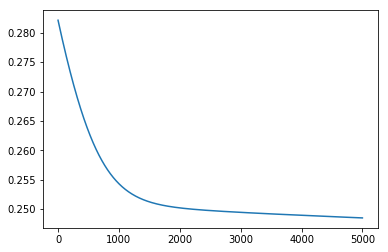

In [67]:
plt.plot(errors)
plt.show()

In [ ]:
# todo: plot